In [ ]:
import pandas as pd
import numpy as np
######################
# standard code block #
#######################
import statsmodels.api as sm

# see https://ipython.readthedocs.io/en/stable/interactive/magics.html
%pylab inline
%config InlineBackend.figure_formats = ['retina']

#######################
#       imports       #
#######################
import pandas as pd
import seaborn as sns
import sklearn


### Let's first import the file and create data frames, as well as do some preliminary data cleaning

In [ ]:
sorted_movie_df=pd.read_csv('sorted_movie_data')
sorted_movie_df2=pd.read_csv('sorted_movie_data2')

In [ ]:
sorted_movie_df=sorted_movie_df.drop(columns=['Unnamed: 0'])
sorted_movie_df2=sorted_movie_df2.drop(columns=['Unnamed: 0','level_0','index'])

In [ ]:
sorted_movie_df2=sorted_movie_df2[['movie','distributor']]

In [ ]:
sorted_movie_df.dtypes

### replace any missing boxoffice and budgetvalue with the data average

In [ ]:
def to_int_box(sorted_movie_df):
    try:
        boxoffice=int(sorted_movie_df['domestic_boxoffice'][i])
        return boxoffice
    except:
        
        return 39586771


def to_int_budget(sorted_movie_df):
    try:
        budget=int(sorted_movie_df['budget'][i])
        return budget
    except:
        
        return 39586771





In [ ]:
i=0
while i < len(sorted_movie_df):
    

    if type(sorted_movie_df['budget'][i])==float:
        sorted_movie_df['budget'][i]=39586771
    elif bool(sorted_movie_df['domestic_boxoffice'][i])==float:
        sorted_movie_df['domestic_boxoffice']=39586771
    
    i+=1
    

In [ ]:
sorted_movie_df['budget'][395]=39586771
sorted_movie_df['budget'][420]=39586771
sorted_movie_df['budget'][421]=39586771
sorted_movie_df['budget'][463]=39586771
sorted_movie_df['budget'][632]=39586771
sorted_movie_df['budget'][647]=39586771
sorted_movie_df['budget'][690]=39586771
sorted_movie_df['budget'][868]=39586771
sorted_movie_df['budget'][1163]=39586771
sorted_movie_df['budget'][1235]=39586771

In [ ]:
sorted_movie_df['domestic_boxoffice'][128]=39586771
sorted_movie_df['domestic_boxoffice'][655]=39586771
sorted_movie_df['domestic_boxoffice'][692]=39586771



In [9]:
sorted_movie_df['budget']=pd.to_numeric(sorted_movie_df['budget'])
sorted_movie_df['domestic_boxoffice']=pd.to_numeric(sorted_movie_df['domestic_boxoffice'])


In [10]:
sorted_movie_df=sorted_movie_df[~sorted_movie_df.isin([np.nan, np.inf, -np.inf]).any(1)]


### now, lets use fuzzywuzzy to match the distributor company with the movie, then making a dummy variable that distinguish between 'big' and 'smaller' production companes

In [11]:
from fuzzywuzzy import process    
def get_matches(query,choice,limit=1):
    
    results=process.extract(query,choice,limit=limit)
    return results

In [12]:
pd.set_option('display.max_rows', 1200)
sorted_movie_df=sorted_movie_df.reset_index()



In [13]:
sorted_movie_df['distributor']=''
for i in range(len(sorted_movie_df)):
    if get_matches(sorted_movie_df['movie'][i],sorted_movie_df2['movie'])[0][1]>95:
        var=get_matches(sorted_movie_df['movie'][i],sorted_movie_df2['movie'])[0][0]
        sorted_movie_df['distributor'][i]=sorted_movie_df2.loc[sorted_movie_df2['movie'] == var,'distributor'].iloc[0]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [14]:
##major companies as per wikipedia, making a reference list

major=['Universal Pictures','Paramount Pictures','Warner Bros.','New Line Cinema','Walt Disney Pictures','20th Century Studios','Columbia Pictures','TriStar Pictures','Sony Pictures']
sorted_movie_df=sorted_movie_df.fillna('fillerstr')

In [15]:
##making a dummy variable
sorted_movie_df['distributor_dummy']=''
for i in range(len(sorted_movie_df['distributor_dummy'])):
    if get_matches(sorted_movie_df['distributor'][i],major)[0][1]>88:
        sorted_movie_df['distributor_dummy'][i]=1
    else:
        sorted_movie_df['distributor_dummy'][i]=0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline


**Let's make the genre into dummies**

In [17]:
sorted_movie_df['Action']=0
sorted_movie_df['Adventure']=0
#sorted_movie_df['Mystery']=0
#sorted_movie_df['Biography']=0
sorted_movie_df['Sci-Fi']=0
sorted_movie_df['War']=0
sorted_movie_df['Comedy']=0
sorted_movie_df['Drama']=0
sorted_movie_df['Crime']=0
sorted_movie_df['Animation']=0
sorted_movie_df['Horror']=0
sorted_movie_df['Romance']=0
sorted_movie_df['Fantasy']=0

In [ ]:
for i in range(len(sorted_movie_df['genre'])):
    if 'Sci-Fi' in sorted_movie_df['genre'][i]:
        sorted_movie_df['Sci-Fi'][i]=1
    elif 'Action' in sorted_movie_df['genre'][i]:
        sorted_movie_df['Action'][i]=1
    elif 'Adventure' in sorted_movie_df['genre'][i]:
        sorted_movie_df['Adventure'][i]=1
    elif 'War' in sorted_movie_df['genre'][i]:
        sorted_movie_df['War'][i]=1
    elif 'Romance' in sorted_movie_df['genre'][i]:
        sorted_movie_df['Romance'][i]=1
    elif 'Comedy' in sorted_movie_df['genre'][i]:
        sorted_movie_df['Comedy'][i]=1
    elif 'Drama' in sorted_movie_df['genre'][i]:
        sorted_movie_df['Drama'][i]=1
    elif 'Crime' in sorted_movie_df['genre'][i]:
        sorted_movie_df['Crime'][i]=1
    elif 'Animation' in sorted_movie_df['genre'][i]:
        sorted_movie_df['Animation'][i]=1
    elif 'Horror' in sorted_movie_df['genre'][i]:
        sorted_movie_df['Horror'][i]=1
    elif 'Fantasy' in sorted_movie_df['genre'][i]:
        sorted_movie_df['Fantasy'][i]=1
    
    

**new sorted movie dataframe with dummies for ratings**

In [19]:
new_sorted_movie_df=sorted_movie_df.join(pd.get_dummies(sorted_movie_df['MPAA_rating']))

In [ ]:
new_sorted_movie_df.dtypes

In [ ]:
new_sorted_movie_df.iloc[:,-5:]


**now, lets try running our model without a train test split**

In [20]:
X = new_sorted_movie_df.drop(columns=["index","oscar_win","movie","genre","MPAA_rating",'distributor']).astype(float)
y = new_sorted_movie_df.loc[:,"oscar_win"].astype(float)

X=np.array(X)
y=np.array(y)

In [21]:
movie_model = sm.OLS(y, X, data=new_sorted_movie_df)
results = movie_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     49.03
Date:                Thu, 16 Jul 2020   Prob (F-statistic):          1.09e-169
Time:                        19:37:27   Log-Likelihood:                -1407.0
No. Observations:                1170   AIC:                             2870.
Df Residuals:                    1142   BIC:                             3012.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0049      0.003     -1.838      0.066      -0.010       0.000
x2             0.3337      0.011     29.517      0.000       0.311       0.356
x3          9.859e-10   3.57e-10      2.764      0.006    2.86e-10    1.69e-09
x4         -5.258e-10   7.89e-10     -0.666      0.505   -2.07e-09    1.02e-09
x5            -0.0240      0.008     -3.128      0.002      -0.039      -0.009
x6          9.825e-05      0.001      0.079      0.937      -0.002       0.003
x7             0.0015      0.001      1.028      0.304      -0.001       0.004
x8             0.0004      0.001      0.263      0.793      -0.002       0.003
x9            -0.1563      0.064     -2.431      0.015      -0.282      -0.030
x10            0.1093      0.067      1.630      0.103      -0.022       0.241
x11           -0.0270      0.052     -0.524      0.600      -0.128       0.074
x12           -0.1382      0.232     -0.595      0.552      -0.594       0.317
x13            0.0390      0.234      0.167      0.868      -0.421       0.499
x14           -0.1209      0.236     -0.512      0.609      -0.585       0.343
x15            0.1249      0.248      0.502      0.615      -0.363       0.612
x16           -0.0871      0.227     -0.383      0.702      -0.533       0.359
x17           -0.1416      0.223     -0.636      0.525      -0.579       0.296
x18            0.6732      0.522      1.290      0.197      -0.351       1.697
x19           -0.0019      0.619     -0.003      0.998      -1.217       1.213
x20            0.3672      0.351      1.046      0.296      -0.321       1.056
x21           -0.0481      0.222     -0.217      0.829      -0.484       0.388
x22           -0.0463      0.849     -0.055      0.957      -1.713       1.620
x23            9.5145      5.278      1.803      0.072      -0.840      19.869
x24            9.5949      5.326      1.801      0.072      -0.855      20.045
x25            9.7307      5.301      1.836      0.067      -0.671      20.132
x26            9.5042      5.283      1.799      0.072      -0.861      19.870
x27            9.5648      5.293      1.807      0.071      -0.820      19.949
x28            9.5803      5.293      1.810      0.071      -0.804      19.964
==============================================================================
Omnibus:                      610.778   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11579.793
Skew:                           1.968   Prob(JB):                         0.00
Kurtosis:                      17.901   Cond. No.                     7.99e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.99e+10. This might i

**a .536, not bad at all, let's see if we can reduce colinearity by grouping the release months**

In [22]:
new_sorted_movie_df['release_quarter']=''
for i in range(len(new_sorted_movie_df)):
    if new_sorted_movie_df['release_month'][i] in [1.0,2.0,3.0]:
        new_sorted_movie_df['release_quarter'][i]=1
    elif new_sorted_movie_df['release_month'][i] in [4.0,5.0,6.0]:
        new_sorted_movie_df['release_quarter'][i]=2
    elif new_sorted_movie_df['release_month'][i] in [7.0,8.0,9.0]:
        new_sorted_movie_df['release_quarter'][i]=3
    elif new_sorted_movie_df['release_month'][i] in [10.0,11.0,12.0]:
        new_sorted_movie_df['release_quarter'][i]=4
    
        

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/

In [23]:
new_sorted_movie_df2=new_sorted_movie_df.drop(columns=['year',"index","movie","genre","MPAA_rating",'distributor','release_month']).astype(float)

In [ ]:
new_sorted_movie_df2.dtypes

In [24]:
X2 = new_sorted_movie_df2.drop(columns=['oscar_win']).astype(float)
y2 = new_sorted_movie_df2.loc[:,"oscar_win"].astype(float)

X2=np.array(X2)
y2=np.array(y2)


In [25]:
movie_model2 = sm.OLS(y2, X2, data=new_sorted_movie_df2)
results2 = movie_model2.fit()
results2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     50.42
Date:                Thu, 16 Jul 2020   Prob (F-statistic):          3.67e-169
Time:                        19:37:51   Log-Likelihood:                -1410.3
No. Observations:                1170   AIC:                             2875.
Df Residuals:                    1143   BIC:                             3011.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3333      0.011     29.482      0.000       0.311       0.356
x2          9.867e-10   3.58e-10      2.760      0.006    2.85e-10    1.69e-09
x3         -7.609e-10   7.78e-10     -0.978      0.328   -2.29e-09    7.66e-10
x4             0.0002      0.001      0.176      0.860      -0.002       0.003
x5             0.0014      0.001      0.969      0.333      -0.001       0.004
x6          2.933e-05      0.001      0.021      0.983      -0.003       0.003
x7            -0.1628      0.064     -2.529      0.012      -0.289      -0.036
x8             0.0890      0.066      1.340      0.181      -0.041       0.219
x9            -0.0140      0.051     -0.274      0.784      -0.114       0.086
x10           -0.1225      0.232     -0.527      0.598      -0.579       0.334
x11            0.0309      0.235      0.132      0.895      -0.430       0.491
x12           -0.1175      0.237     -0.496      0.620      -0.582       0.347
x13            0.1244      0.249      0.500      0.617      -0.364       0.613
x14           -0.0775      0.228     -0.340      0.734      -0.524       0.369
x15           -0.1391      0.223     -0.624      0.533      -0.577       0.299
x16            0.7291      0.522      1.396      0.163      -0.296       1.754
x17           -0.0135      0.621     -0.022      0.983      -1.231       1.204
x18            0.3875      0.352      1.102      0.271      -0.303       1.077
x19           -0.0427      0.223     -0.192      0.848      -0.479       0.394
x20           -0.0018      0.852     -0.002      0.998      -1.673       1.669
x21           -0.1674      0.315     -0.531      0.596      -0.786       0.451
x22           -0.0359      0.868     -0.041      0.967      -1.739       1.667
x23            0.0092      0.290      0.032      0.975      -0.559       0.577
x24           -0.1910      0.283     -0.676      0.499      -0.745       0.363
x25           -0.1474      0.284     -0.520      0.603      -0.704       0.409
x26           -0.1311      0.287     -0.457      0.648      -0.694       0.432
x27           -0.0626      0.024     -2.632      0.009      -0.109      -0.016
==============================================================================
Omnibus:                      613.963   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11769.031
Skew:                           1.979   Prob(JB):                         0.00
Kurtosis:                      18.025   Cond. No.                     6.45e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
""

**r squared dropped but condition number improved, let's keep feature engineering**

In [ ]:
figure(figsize=(20,10))
sns.pairplot(new_sorted_movie_df2, height=1.2, aspect=1.5);



In [ ]:
figure(figsize=(30,20))
sns.heatmap(new_sorted_movie_df2.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);


In [26]:
new_sorted_movie_df3=pd.get_dummies(new_sorted_movie_df2, columns=['release_quarter'])


In [ ]:
new_sorted_movie_df3.dtypes

In [27]:
X3 = new_sorted_movie_df3.drop(columns=['oscar_win']).astype(float)
y3 = new_sorted_movie_df3.loc[:,"oscar_win"].astype(float)

X3=np.array(X3)
y3=np.array(y3)



In [28]:
movie_model3 = sm.OLS(y3, X3, data=new_sorted_movie_df3)
results3 = movie_model3.fit()
results3.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     46.96
Date:                Thu, 16 Jul 2020   Prob (F-statistic):          4.61e-168
Time:                        19:38:21   Log-Likelihood:                -1408.9
No. Observations:                1170   AIC:                             2876.
Df Residuals:                    1141   BIC:                             3023.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3317      0.011     29.241      0.000       0.309       0.354
x2          1.035e-09   3.59e-10      2.886      0.004    3.31e-10    1.74e-09
x3         -7.594e-10   7.79e-10     -0.975      0.330   -2.29e-09    7.68e-10
x4             0.0002      0.001      0.173      0.863      -0.002       0.003
x5             0.0014      0.001      0.951      0.342      -0.001       0.004
x6             0.0001      0.001      0.090      0.928      -0.003       0.003
x7            -0.1675      0.064     -2.598      0.009      -0.294      -0.041
x8             0.0868      0.066      1.307      0.192      -0.044       0.217
x9            -0.0103      0.051     -0.202      0.840      -0.111       0.090
x10           -0.1052      0.233     -0.452      0.652      -0.562       0.352
x11            0.0298      0.235      0.127      0.899      -0.431       0.490
x12           -0.1069      0.237     -0.451      0.652      -0.572       0.358
x13            0.1221      0.249      0.491      0.624      -0.366       0.610
x14           -0.0798      0.228     -0.350      0.726      -0.526       0.367
x15           -0.1384      0.223     -0.620      0.535      -0.576       0.300
x16            0.7290      0.522      1.396      0.163      -0.296       1.754
x17            0.0162      0.621      0.026      0.979      -1.202       1.234
x18            0.3812      0.352      1.083      0.279      -0.309       1.072
x19           -0.0399      0.223     -0.179      0.858      -0.477       0.397
x20           -0.0046      0.851     -0.005      0.996      -1.675       1.666
x21           -0.1504      0.194     -0.774      0.439      -0.532       0.231
x22           -0.0484      0.748     -0.065      0.948      -1.515       1.418
x23            0.0214      0.174      0.123      0.902      -0.320       0.363
x24           -0.1949      0.149     -1.304      0.193      -0.488       0.098
x25           -0.1475      0.147     -1.006      0.315      -0.435       0.140
x26           -0.1344      0.149     -0.899      0.369      -0.427       0.159
x27            0.0066      0.191      0.035      0.972      -0.368       0.381
x28           -0.2032      0.189     -1.073      0.283      -0.575       0.168
x29           -0.2132      0.191     -1.116      0.265      -0.588       0.162
x30           -0.2443      0.187     -1.304      0.193      -0.612       0.123
==============================================================================
Omnibus:                      611.711   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11680.628
Skew:                           1.970   Prob(JB):                         0.00
Kurtosis:                      17.969   Cond. No.                     1.20e+16
==============================================================================

W

**let's do the first train test split with sklearn**

In [29]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

import pandas as pd
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression






Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['var']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [295]:
def split_and_validate(X,y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 
        

In [ ]:
#X3 = new_sorted_movie_df3.drop(columns=['oscar_win']).astype(float)
#y3 = new_sorted_movie_df3.loc[:,"oscar_win"].astype(float)


split_and_validate(X3, y3)


In [31]:
new_sorted_movie_df3['R']=new_sorted_movie_df3['R']+new_sorted_movie_df3['NC17']
new_sorted_movie_df3['PG']=new_sorted_movie_df3['PG']+new_sorted_movie_df3['PG-13']
new_sorted_movie_df3.drop(columns=['NC17','PG-13'],inplace=True)

In [32]:
X4 = new_sorted_movie_df3.drop(columns=['oscar_win']).astype(float)
y4 = new_sorted_movie_df3.loc[:,"oscar_win"].astype(float)


#split_and_validate(X4, y4)

In [36]:
X4=np.array(X4)
y4=np.array(y4)

movie_model4 = sm.OLS(y4, X4, data=new_sorted_movie_df3)
results4 = movie_model4.fit()
results4.summary(xname=[i for i in new_sorted_movie_df3.drop(columns=['oscar_win']).columns])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     50.63
Date:                Thu, 16 Jul 2020   Prob (F-statistic):          1.08e-169
Time:                        19:40:39   Log-Likelihood:                -1409.0
No. Observations:                1170   AIC:                             2872.
Df Residuals:                    1143   BIC:                             3009.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
times_nominated         0.3319      0.011     29.316      0.000       0.310       0.354
domestic_boxoffice   1.037e-09   3.58e-10      2.892      0.004    3.33e-10    1.74e-09
budget              -7.719e-10   7.78e-10     -0.993      0.321    -2.3e-09    7.54e-10
running_time            0.0003      0.001      0.259      0.795      -0.002       0.003
tropes                  0.0013      0.001      0.903      0.367      -0.002       0.004
rt_score             5.673e-05      0.001      0.041      0.968      -0.003       0.003
book_based             -0.1693      0.064     -2.630      0.009      -0.296      -0.043
true_story_based        0.0890      0.066      1.345      0.179      -0.041       0.219
distributor_dummy      -0.0089      0.051     -0.174      0.862      -0.109       0.091
Action                 -0.0996      0.233     -0.428      0.669      -0.556       0.357
Adventure               0.0189      0.234      0.081      0.936      -0.440       0.477
Sci-Fi                 -0.0981      0.236     -0.415      0.678      -0.562       0.366
War                     0.1266      0.249      0.509      0.611      -0.361       0.614
Comedy                 -0.0761      0.227     -0.335      0.738      -0.522       0.370
Drama                  -0.1350      0.223     -0.605      0.545      -0.572       0.302
Crime                   0.7335      0.522      1.406      0.160      -0.290       1.757
Animation              -0.0077      0.619     -0.012      0.990      -1.222       1.207
Horror                  0.3861      0.352      1.098      0.272      -0.304       1.076
Romance                -0.0365      0.222     -0.164      0.870      -0.473       0.400
Fantasy                -0.0011      0.851     -0.001      0.999      -1.670       1.668
G                      -0.1733      0.192     -0.905      0.366      -0.549       0.203
NR                     -0.0116      0.168     -0.069      0.945      -0.342       0.319
PG                     -0.1969      0.145     -1.362      0.174      -0.481       0.087
R                      -0.1706      0.151     -1.127      0.260      -0.468       0.126
release_quarter_1.0     0.0304      0.147      0.207      0.836      -0.258       0.319
release_quarter_2.0    -0.1776      0.145     -1.228      0.220      -0.461       0.106
release_quarter_3.0    -0.1870      0.147     -1.275      0.203      -0.475       0.101
release_quarter_4.0    -0.2182      0.143     -1.528      0.127      -0.498       0.062
==============================================================================
Omnibus:                      613.187   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11761.867
Skew:                           1.975   Prob(JB):                         0.00
Kurtosis:                      18.022  

**Condition number is quiet high: 5.44e+09, meaning theres strong multicollinearity in our data,let's see what VIF factor tells us about our features**

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(new_sorted_movie_df3.drop(columns=['oscar_win']))
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


const                   0.000000
times_nominated         1.401296
domestic_boxoffice      2.661044
budget                  2.775914
running_time            1.442243
tropes                  1.615408
rt_score                1.177114
book_based              1.039134
true_story_based        1.194351
distributor_dummy       1.094583
Action                  9.191167
Adventure               9.087720
Sci-Fi                  8.966355
War                     4.351434
Comedy                  9.023323
Drama                  18.084959
Crime                   1.222421
Animation               1.148208
Horror                  1.656118
Romance                14.450208
Fantasy                 1.084851
G                            inf
NR                           inf
PG                           inf
R                            inf
release_quarter_1.0          inf
release_quarter_2.0          inf
release_quarter_3.0          inf
release_quarter_4.0          inf
dtype: float64

**VIFs are pretty for some of the genres are pretty high,especially drama and romance. let's make note of that and we will come back to it later**

In [ ]:
new_sorted_movie_df4=new_sorted_movie_df3.drop(columns=['War','Romance','Horror','Crime','Fantasy']).copy()

In [ ]:
X = add_constant(new_sorted_movie_df4.drop(columns=['oscar_win']))
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

**This is an improvement,nice**

**Adjusted R squared and Condition number also saw improvements, very good**

In [ ]:
X4 = new_sorted_movie_df4.drop(columns=['oscar_win']).astype(float)
y4 = new_sorted_movie_df4.loc[:,"oscar_win"].astype(float)

In [ ]:
split_and_validate(X4,y4)

In [ ]:
X4 = new_sorted_movie_df4.drop(columns=['oscar_win']).astype(float)
y4 = new_sorted_movie_df4.loc[:,"oscar_win"].astype(float)

X4=np.array(X4)
y4=np.array(y4)


movie_model4 = sm.OLS(y4, X4, data=new_sorted_movie_df4)
results4 = movie_model4.fit()
results4.summary(xname=[i for i in new_sorted_movie_df4.drop(columns=['oscar_win']).columns ])




<Figure size 2000x1000 with 0 Axes>

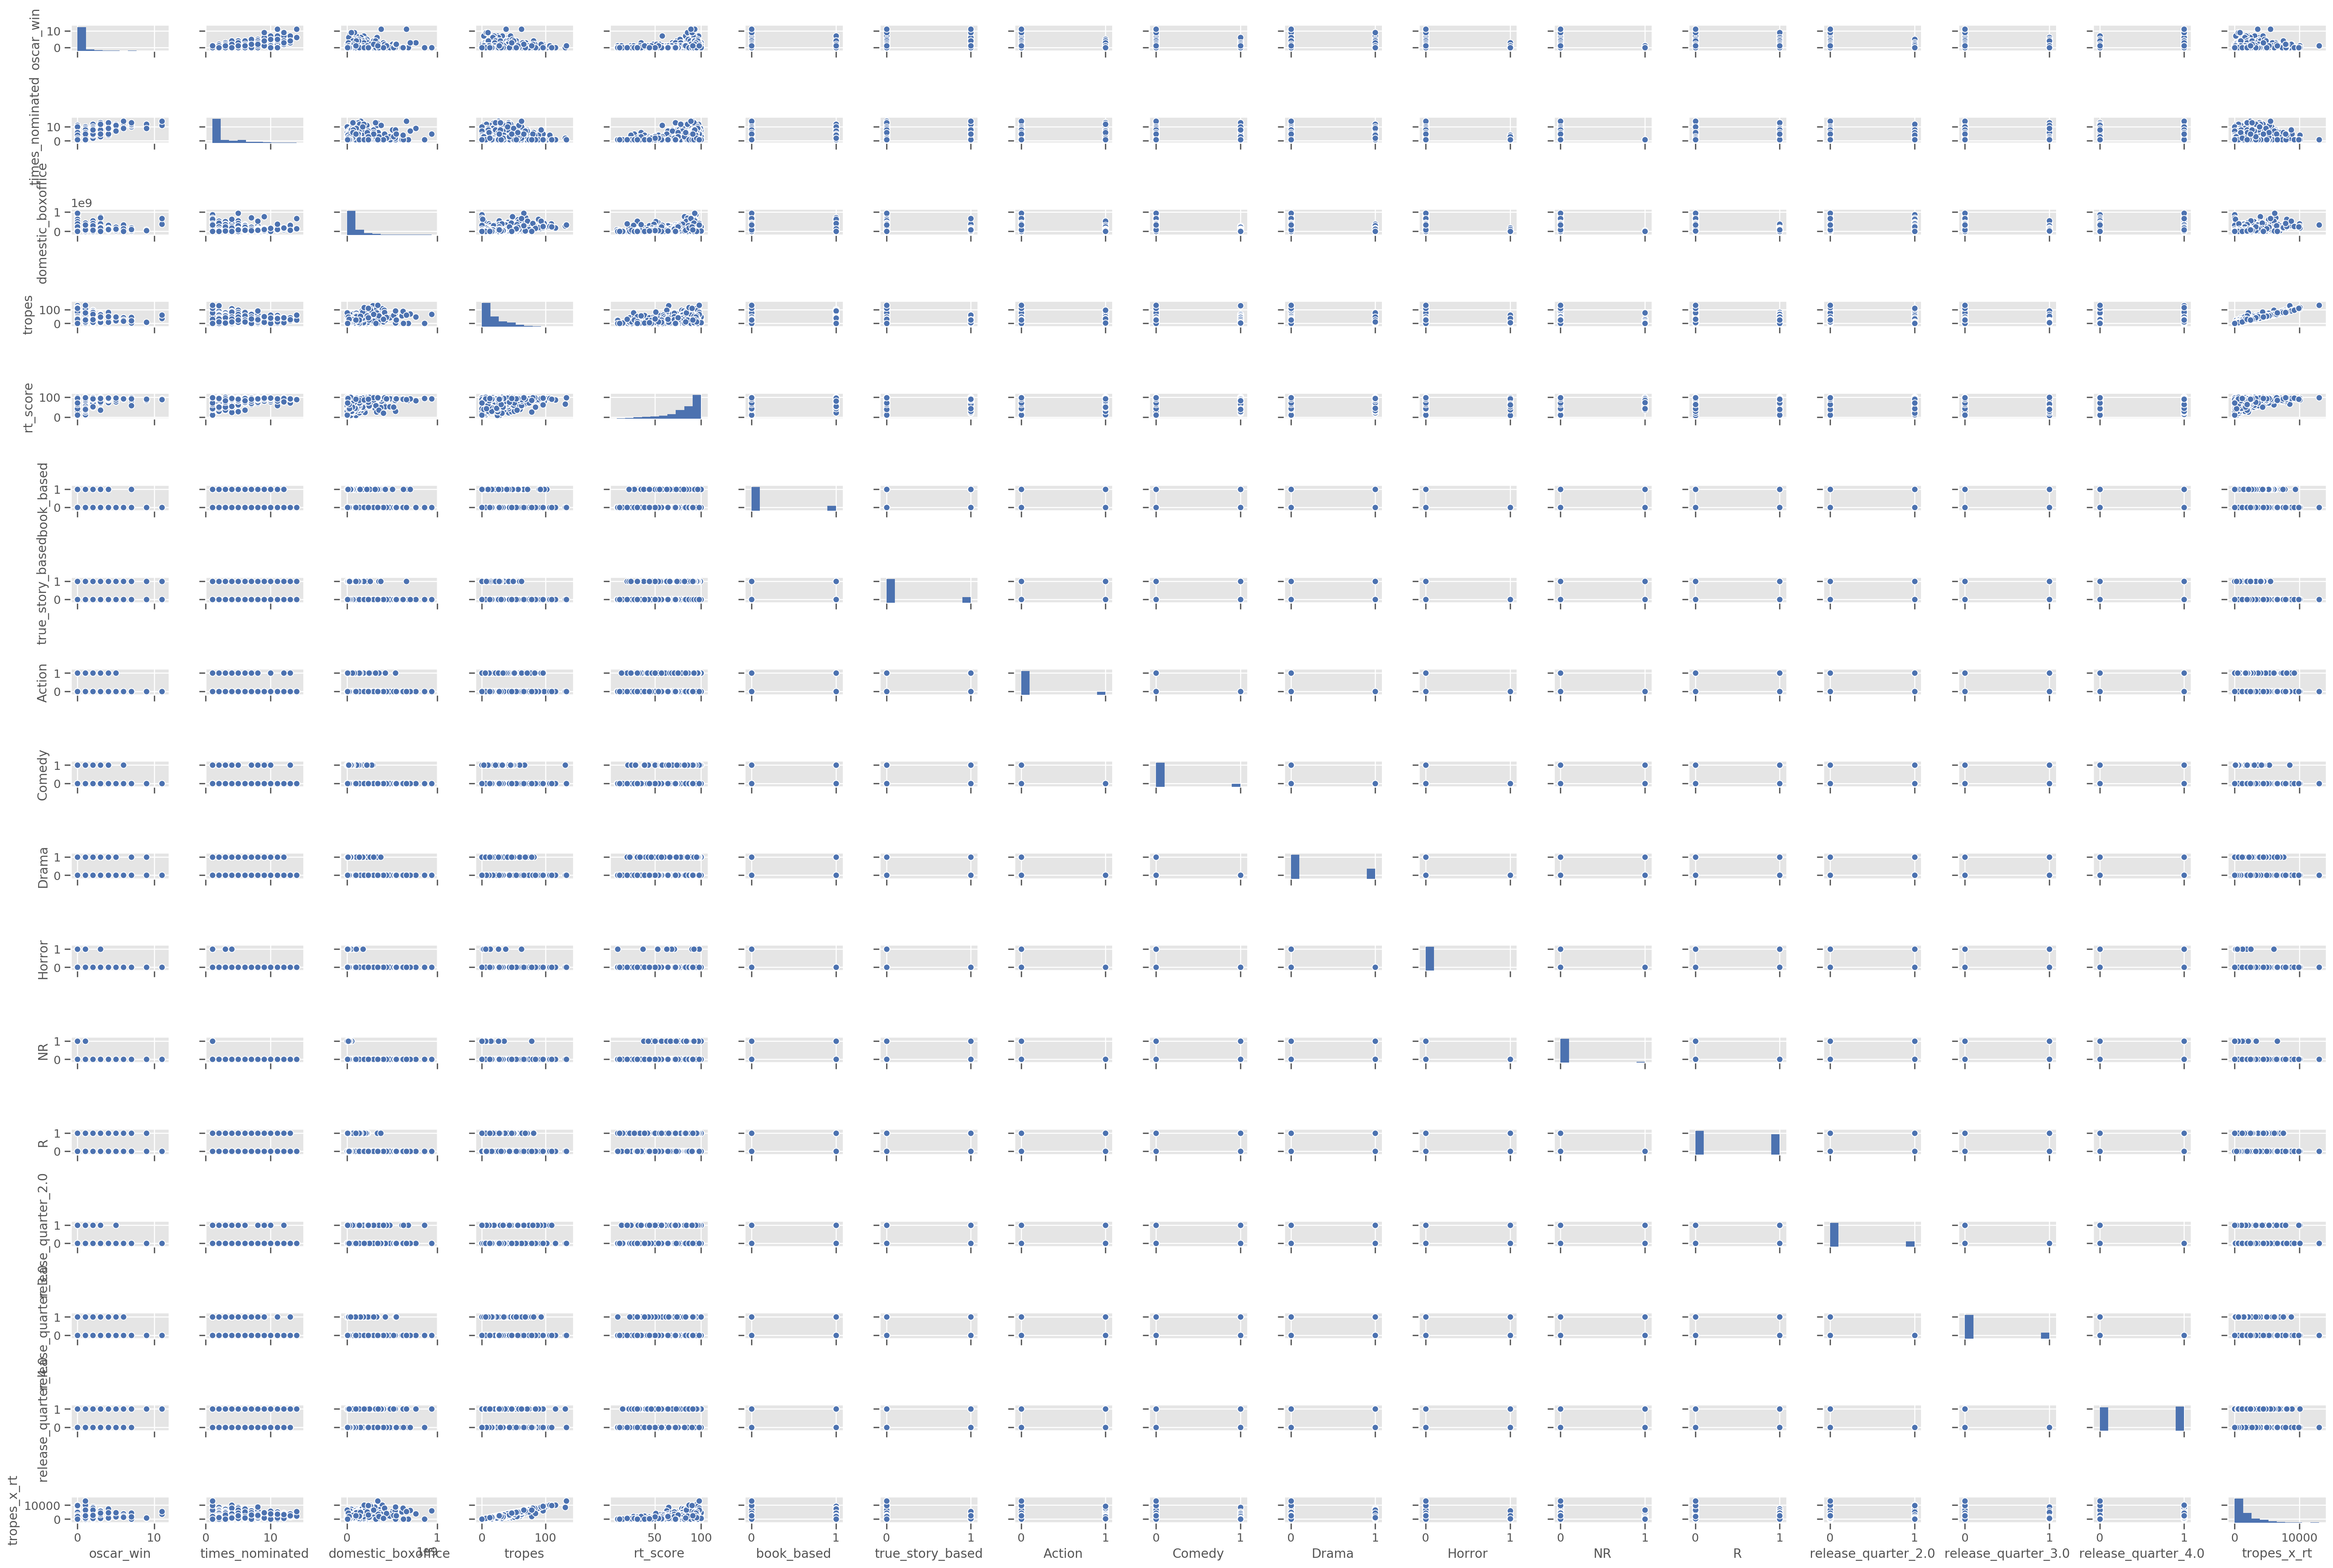

In [501]:
figure(figsize=(20,10))
sns.pairplot(new_sorted_movie_df4, height=1.2, aspect=1.5);




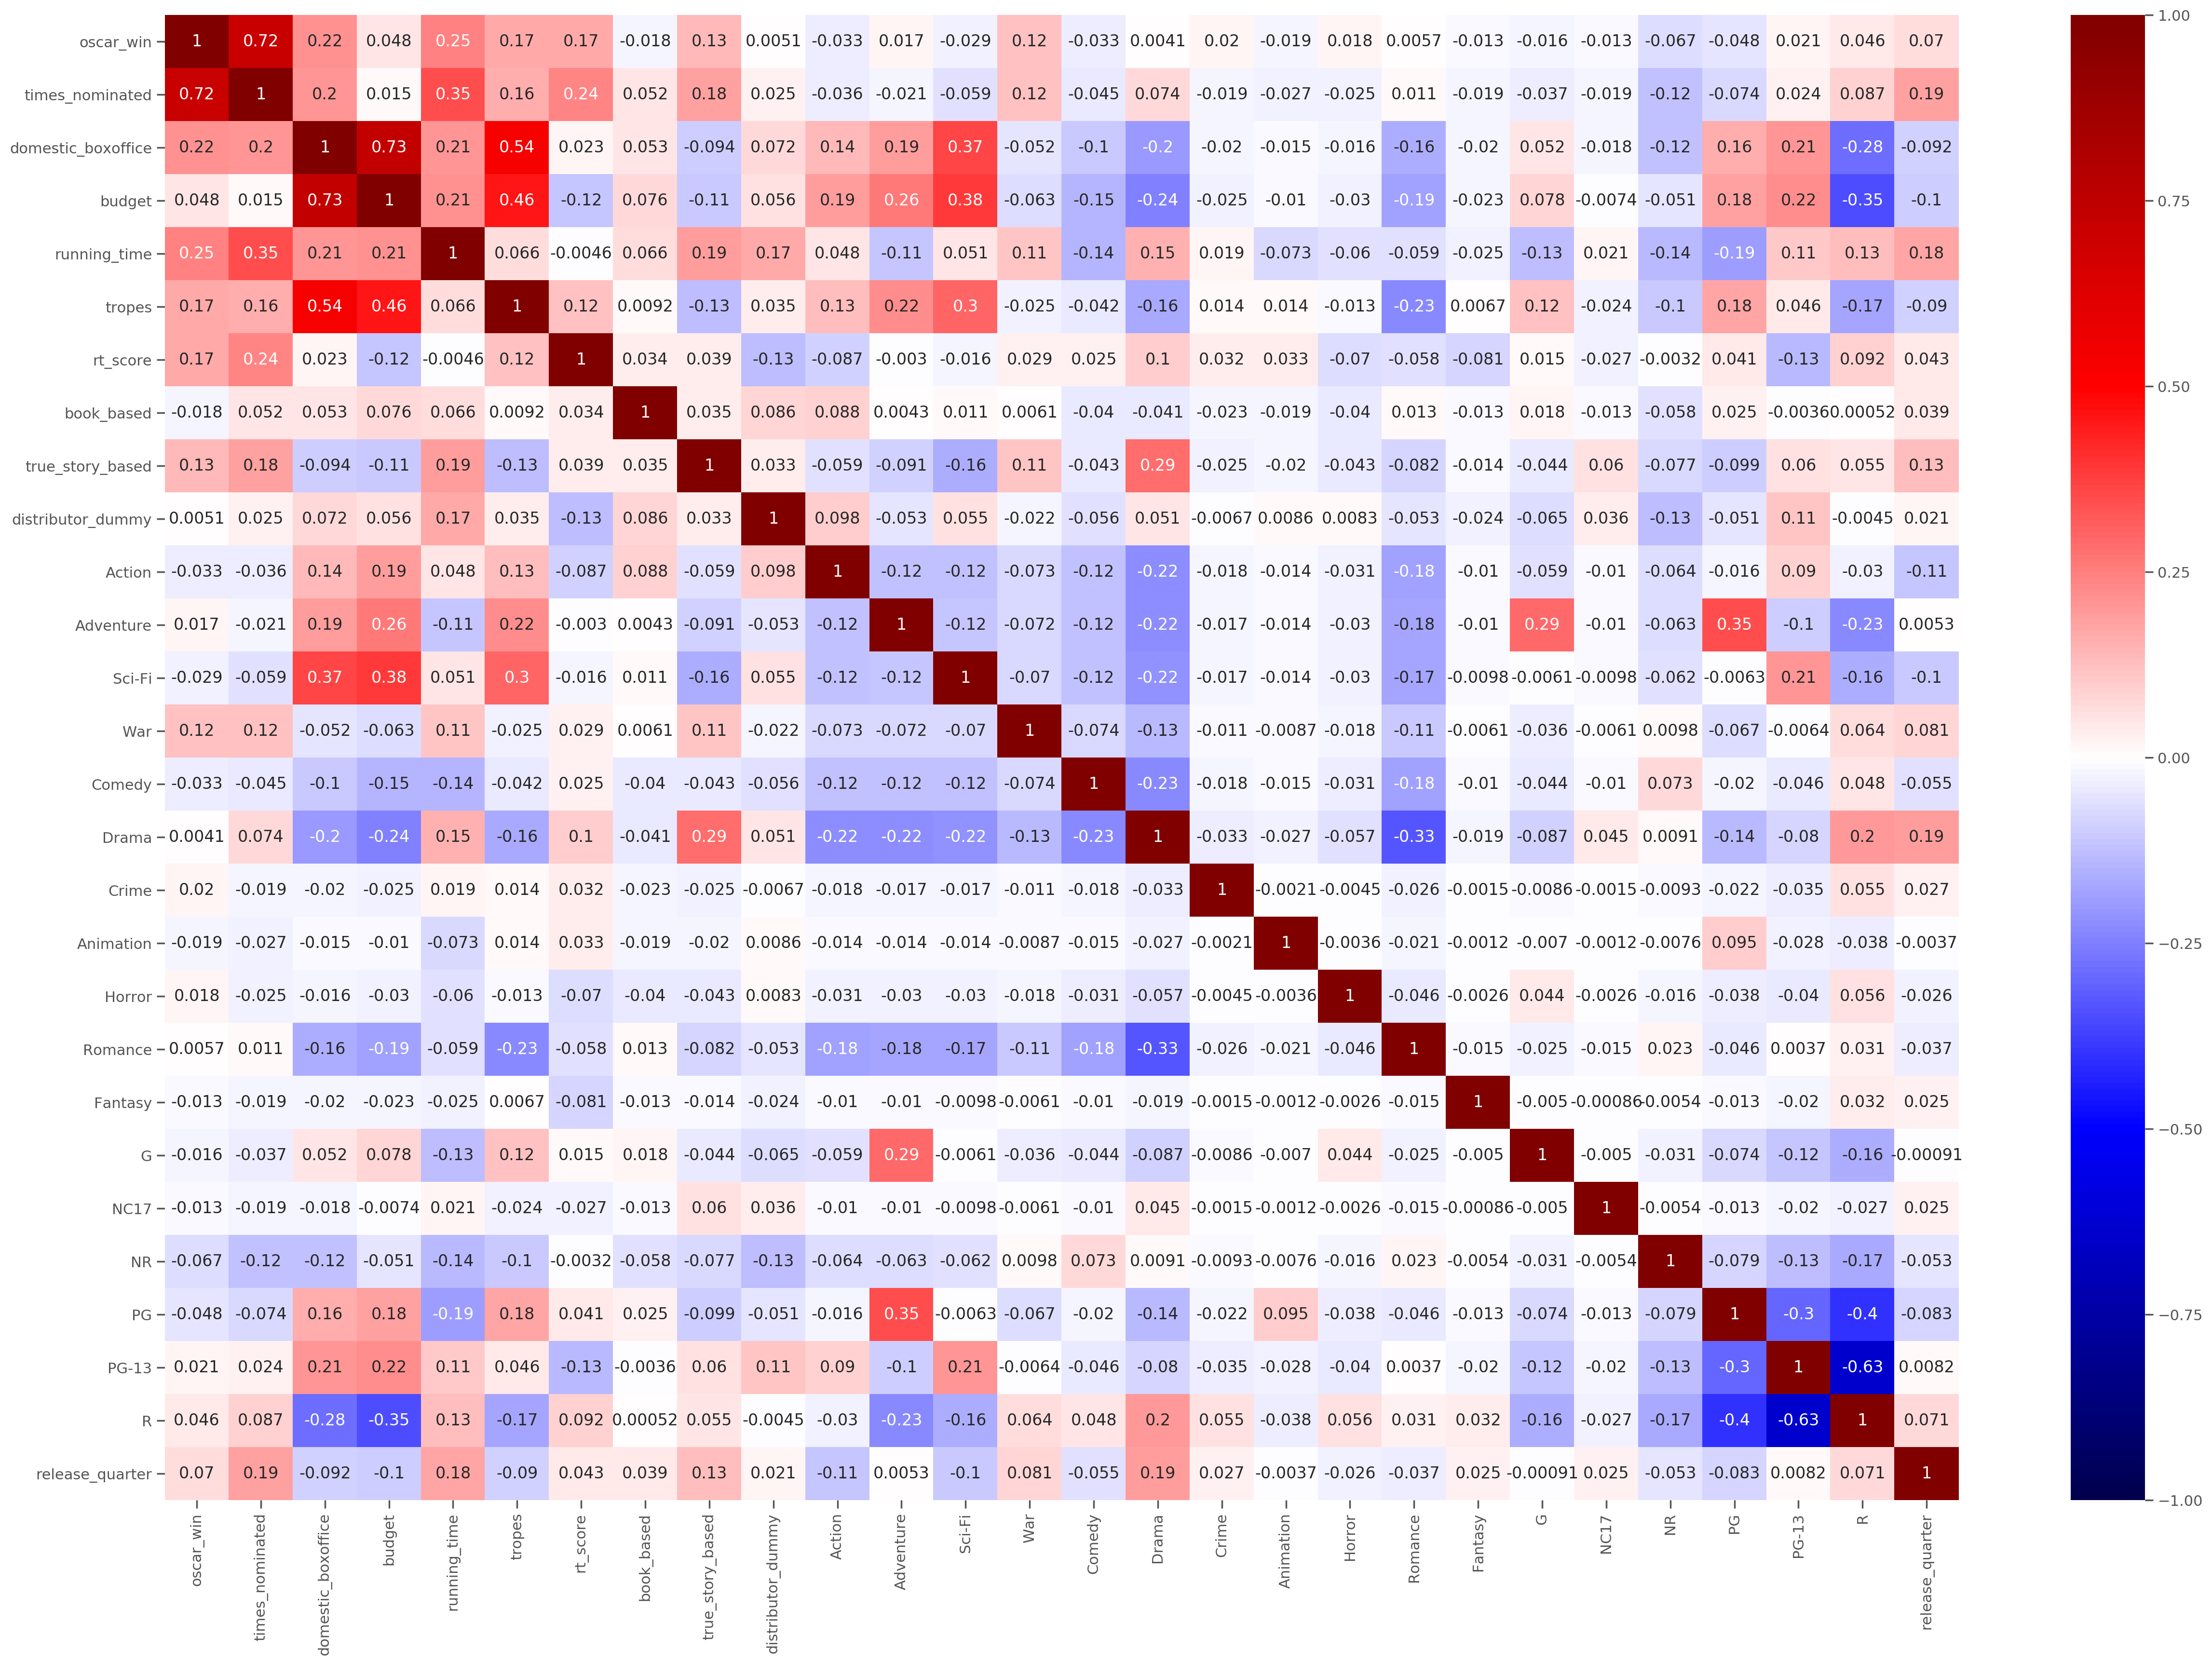

In [502]:
figure(figsize=(30,20))
sns.heatmap(new_sorted_movie_df2.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);



**Let's run a train test split with LASSO**

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [53]:
std = StandardScaler()
X4 = new_sorted_movie_df3.drop(columns=['oscar_win']).astype(float)
y4 = new_sorted_movie_df3.loc[:,"oscar_win"].astype(float)

In [54]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X4, y4, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=42)

In [42]:
%pylab inline
#% config InlineBackend.figure_format = 'svg'

import pandas as pd
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

Populating the interactive namespace from numpy and matplotlib


In [55]:
std.fit(X_train.values)
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [48]:
type(X_train)

numpy.ndarray

In [81]:
alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [57]:
lasso_model.alpha_

0.04605922041145106

In [65]:
list(zip(X_train.columns, lasso_model.coef_))

[('times_nominated', 0.8043132279935872),
 ('domestic_boxoffice', 0.08365027873555199),
 ('budget', 0.0),
 ('running_time', -0.0),
 ('tropes', 0.007087359625228541),
 ('rt_score', 0.0),
 ('book_based', -0.0),
 ('true_story_based', 0.0),
 ('distributor_dummy', 0.0),
 ('Action', -0.0),
 ('Adventure', 0.0),
 ('Sci-Fi', -0.0),
 ('War', 0.0),
 ('Comedy', -0.0),
 ('Drama', -0.0),
 ('Crime', 0.0),
 ('Animation', 0.0),
 ('Horror', 0.005810449760910197),
 ('Romance', -0.0),
 ('Fantasy', 0.0),
 ('G', 0.0),
 ('NR', 0.0),
 ('PG', 0.0),
 ('R', -0.0),
 ('release_quarter_1.0', 0.04145729044886907),
 ('release_quarter_2.0', -0.0),
 ('release_quarter_3.0', 0.0),
 ('release_quarter_4.0', -0.0)]

In [68]:
test_set_pred=lasso_model.predict(X_te)

In [69]:
mae(y_test, test_set_pred)

0.48344591682613236

In [70]:
r2_score(y_test, test_set_pred)

0.45377684157272646

In [61]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

In [62]:
alphalist = 10**(np.linspace(-2,2,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    # note the use of a new sklearn utility: Pipeline to pack
    # multiple modeling steps into one fitting process 
    steps = [('standardize', StandardScaler()), 
             ('lasso', Lasso(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.values, y_train)
    
    val_set_pred = pipe.predict(X_val.values)
    err_vec_val[i] = mae(y_val, val_set_pred)

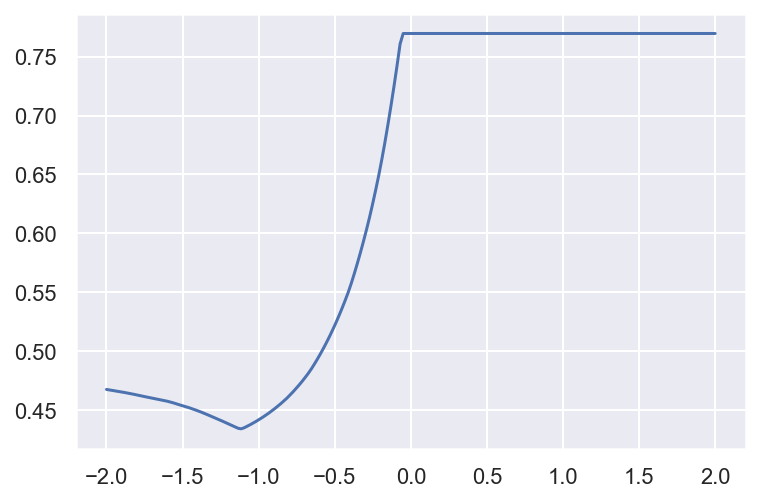

In [63]:
plt.plot(np.log10(alphalist), err_vec_val)

In [64]:
alphalist[np.argmin(err_vec_val)]

0.07663410868007459

**Added some interraction effect,and took out some effect shown with 0 as beta. LASSO take 2**

In [339]:
X5=X4.copy()

X5['tropes_x_rt']=X4['tropes']*X4['rt_score']


In [340]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X5, y4, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=42)

In [341]:
std.fit(X_train.values)
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [342]:
alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [343]:
test_set_pred=lasso_model.predict(X_te)

In [344]:
lasso_model.alpha_

0.04605922041145106

In [345]:
list(zip(X_train.columns, lasso_model.coef_))

[('times_nominated', 0.8020771009563605),
 ('domestic_boxoffice', 0.07588127835979021),
 ('budget', 0.0),
 ('running_time', -0.0),
 ('tropes', 0.0),
 ('rt_score', 0.0),
 ('book_based', -0.0),
 ('true_story_based', 0.0),
 ('distributor_dummy', 0.0),
 ('Action', -0.0),
 ('Adventure', 0.0),
 ('Sci-Fi', -0.0),
 ('War', 0.0),
 ('Comedy', -0.0),
 ('Drama', -0.0),
 ('Crime', 0.0),
 ('Animation', 0.0),
 ('Horror', 0.006066309254743671),
 ('Romance', 0.0),
 ('Fantasy', 0.0),
 ('G', 0.0),
 ('NR', 0.0),
 ('PG', 0.0),
 ('R', -0.0),
 ('release_quarter_1.0', 0.041181641728021794),
 ('release_quarter_2.0', -0.0),
 ('release_quarter_3.0', 0.0),
 ('release_quarter_4.0', -0.0),
 ('tropes_x_rt', 0.02332859554243876)]

In [346]:
mae(y_test, test_set_pred)

0.4843109518698235

In [347]:
r2_score(y_test, test_set_pred)

0.4538125495867156

**rotten tomatoes and number of tropes seem to have an interraction effect, lets keep that and trim/combine some other features in a new dataframe**.

In [ ]:
X5['Exciting']=X4['Action']+X4['Adventure']+X4['Sci-Fi']
X5['Serious']=X4['Drama']+X4['Crime']+X4['War']
X5['light-hearted']=X4['Animation']+X4['Comedy']+X4['Romance']

In [139]:
new_sorted_movie_df3['Exciting']=new_sorted_movie_df3['Action']+new_sorted_movie_df3['Adventure']+new_sorted_movie_df3['Sci-Fi']
new_sorted_movie_df3['light-hearted']=new_sorted_movie_df3['Drama']+new_sorted_movie_df3['Crime']+new_sorted_movie_df3['War']
new_sorted_movie_df3['Serious']=new_sorted_movie_df3['Animation']+new_sorted_movie_df3['Comedy']+new_sorted_movie_df3['Romance']
new_sorted_movie_df3['tropes_x_rt']=new_sorted_movie_df3['tropes']*new_sorted_movie_df3['rt_score']
new_sorted_movie_df3['oscar_season']=new_sorted_movie_df3['release_quarter_4.0']
new_sorted_movie_df3['regular_season']=new_sorted_movie_df3['release_quarter_3.0']+new_sorted_movie_df3['release_quarter_2.0']+new_sorted_movie_df3['release_quarter_1.0']


In [348]:
new_sorted_movie_df4=new_sorted_movie_df3.drop(columns=['Crime','War','Fantasy','Romance','Adventure','Animation','Sci-Fi','Exciting','light-hearted','Serious','running_time','budget','distributor_dummy','regular_season','oscar_season','G','PG','release_quarter_1.0'])

In [447]:
X6 = new_sorted_movie_df4.drop(columns=['oscar_win','Comedy','rt_score','tropes','R']).astype(float)
y6 = new_sorted_movie_df4.loc[:,"oscar_win"].astype(float)

X6=np.array(X6)
y6=np.array(y6)

movie_model7 = sm.OLS(y6, X6, data=new_sorted_movie_df4)
results7 = movie_model7.fit()
results7.summary(xname=[i for i in new_sorted_movie_df4.drop(columns=['oscar_win','Comedy','R','rt_score','tropes']).columns])

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.611
Model:                            OLS   Adj. R-squared (uncentered):              0.607
Method:                 Least Squares   F-statistic:                              151.4
Date:                Fri, 17 Jul 2020   Prob (F-statistic):                   2.94e-227
Time:                        04:35:54   Log-Likelihood:                         -1415.2
No. Observations:                1170   AIC:                                      2854.
Df Residuals:                    1158   BIC:                                      2915.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
times_nominated         0.3318      0.010     32.522      0.000       0.312       0.352
domestic_boxoffice     6.2e-10   2.67e-10      2.324      0.020    9.66e-11    1.14e-09
book_based             -0.1925      0.063     -3.039      0.002      -0.317      -0.068
true_story_based        0.0896      0.065      1.387      0.166      -0.037       0.216
Action                 -0.0917      0.080     -1.146      0.252      -0.249       0.065
Drama                  -0.1225      0.057     -2.157      0.031      -0.234      -0.011
Horror                  0.3807      0.273      1.393      0.164      -0.156       0.917
NR                      0.1234      0.136      0.907      0.365      -0.144       0.390
release_quarter_2.0    -0.3521      0.067     -5.272      0.000      -0.483      -0.221
release_quarter_3.0    -0.3589      0.065     -5.499      0.000      -0.487      -0.231
release_quarter_4.0    -0.3741      0.051     -7.269      0.000      -0.475      -0.273
tropes_x_rt          1.355e-05   1.52e-05      0.889      0.374   -1.63e-05    4.34e-05
==============================================================================
Omnibus:                      640.780   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12674.274
Skew:                           2.091   Prob(JB):                         0.00
Kurtosis:                      18.572   Cond. No.                     1.53e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [350]:
X6 = new_sorted_movie_df4.drop(columns=['oscar_win']).astype(float)
y6 = new_sorted_movie_df4.loc[:,"oscar_win"].astype(float)


X_train_val, X_test, y_train_val, y_test = train_test_split(X6, y6, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=42)

In [351]:
std.fit(X_train.values)

X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [352]:
alphavec = 10**np.linspace(-2,2,200)

lr_model_ridge = RidgeCV(alphas = alphavec)
lr_model_ridge.fit(X_train, y_train)



RidgeCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [353]:
list(zip(X_train.columns, lr_model_ridge.coef_))

[('times_nominated', 0.3330506411082721),
 ('domestic_boxoffice', -8.940696716308594e-08),
 ('tropes', -0.012691866512674732),
 ('rt_score', -0.0027663747993358356),
 ('book_based', -0.1017963536342958),
 ('true_story_based', 0.10225394709095703),
 ('Action', -0.09788884365277672),
 ('Comedy', -0.05768427445372443),
 ('Drama', -0.06332593480371584),
 ('Horror', 0.24489707629703583),
 ('NR', 0.1313573282972494),
 ('R', -0.004419933672995591),
 ('release_quarter_2.0', -0.2460798566977599),
 ('release_quarter_3.0', -0.1845332698252884),
 ('release_quarter_4.0', -0.22037779353043296),
 ('tropes_x_rt', 0.0001803092561090125)]

In [354]:
test_set_pred_r = lr_model_ridge.predict(X_te)

In [355]:
lr_model_ridge.alpha_

7.488103857590023

In [356]:
mae(y_test, test_set_pred)

0.4843109518698235

In [357]:
r2_score(y_test, test_set_pred)

0.4538125495867156

**Decent score! Let's see if we will have a better time with OLS with adjusted and added feature engineering**

**Let's do an OLS regression with cross validation and KFold

In [358]:
from sklearn.model_selection import KFold

In [359]:
X, X_test, y, y_test = train_test_split(X6, y6, test_size=.2, random_state=42) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [360]:
kf = KFold(n_splits=5, shuffle=True, random_state = 42)
cv_lm_r2s, cv_lm_scale_r2s = [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')

Simple regression scores:  [0.5067828798209749, 0.5381716657180875, 0.5083695960105541, 0.5902561071922519, 0.5225734214965441]
Simple mean cv r^2: 0.533 +- 0.031


**lets run a simple train test split**

In [364]:
X6 = new_sorted_movie_df4.drop(columns=['oscar_win']).astype(float)
y6 = new_sorted_movie_df4.loc[:,"oscar_win"].astype(float)

X, X_test, y, y_test = train_test_split(X6, y6, test_size=.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=42)
lm = LinearRegression()

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

Linear Regression val R^2: 0.541


In [362]:
lm.fit(X,y)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

Linear Regression test R^2: 0.454


**0.454 that's better than Ridge**

**Let's run LASSO ONE MORE TIME**

In [427]:
X7=new_sorted_movie_df4.drop(columns=['oscar_win','R','Comedy','rt_score','tropes']).astype(float)

In [428]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X7, y6, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=42)

In [429]:
std.fit(X_train.values)
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [430]:
alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [431]:
list(zip(X_train.columns, lasso_model.coef_))

[('times_nominated', 0.8263650893500428),
 ('domestic_boxoffice', 0.10267673118270204),
 ('book_based', -0.032299732779721806),
 ('true_story_based', 0.026025483668765746),
 ('Action', -0.019839325968804108),
 ('Drama', -0.012271155359937346),
 ('Horror', 0.04149781722291906),
 ('NR', 0.01938434186178822),
 ('release_quarter_2.0', -0.06308033051311704),
 ('release_quarter_3.0', -0.042878649984788415),
 ('release_quarter_4.0', -0.07234382314525328),
 ('tropes_x_rt', 0.044802647109895816)]

In [432]:
test_set_pred=lasso_model.predict(X_te)

In [449]:
lasso_model.alpha_

0.010969857978923836

In [433]:
mae(y_test, test_set_pred)

0.4974004520080452

In [434]:
r2_score(y_test, test_set_pred)

0.4592980476265609

### .459! That's the best R squared on a test set value so far, given by LASSO regression!

**let's try to visualize the data**

In [ ]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15))

In [384]:
np.delete(lasso_model.coef_,12)
features=list(X_train)

In [388]:
lasso_model.coef_

array([ 0.82559211,  0.10168979,  0.        , -0.        , -0.03134403,
        0.02403188, -0.01856393, -0.        , -0.01083658,  0.04047258,
        0.01804381, -0.        , -0.05749293, -0.0372062 , -0.06569755,
        0.0440346 ])

In [409]:
coef=lasso_model.coef_.copy()

In [417]:
features=X_train.columns.copy()


In [416]:
features=

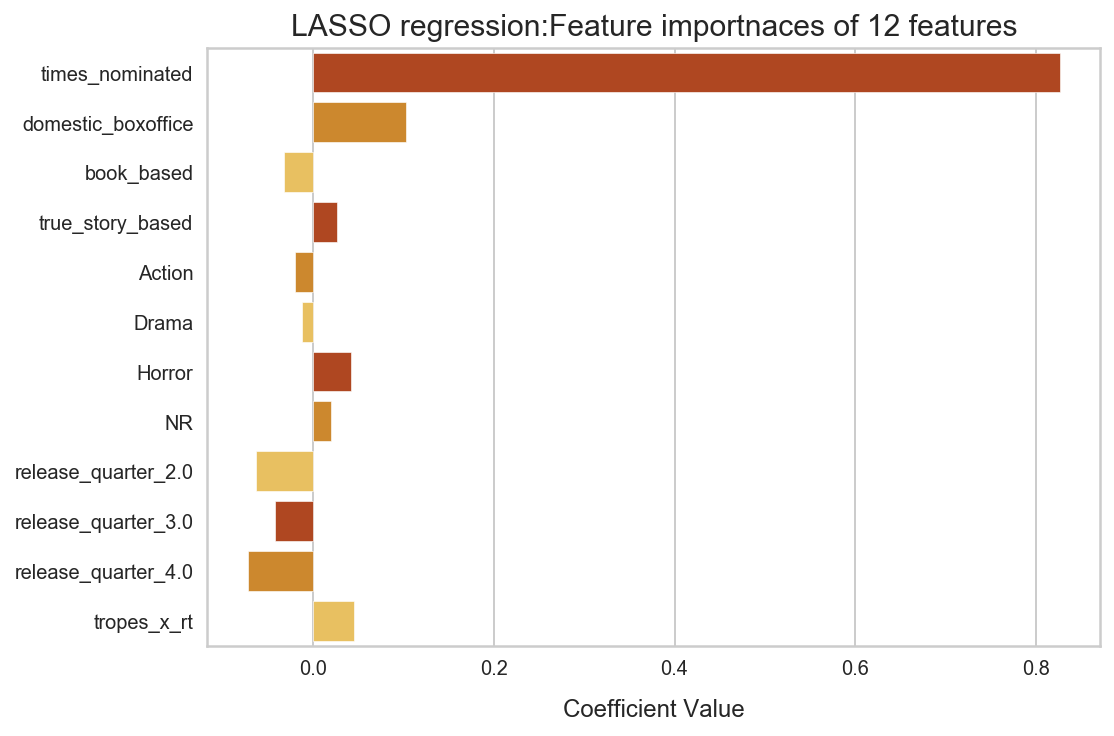

In [440]:
sns.barplot(x=lasso_model.coef_, y=X_train.columns,label="Alcohol-involved", palette=['#c63c0a','#e68c14','#ffc94a'])
plt.xlabel('Coefficient Value',fontsize = 12,labelpad=10)
plt.title('LASSO regression:Feature importnaces of 12 features',fontsize=15);
plt.savefig('Features.png')

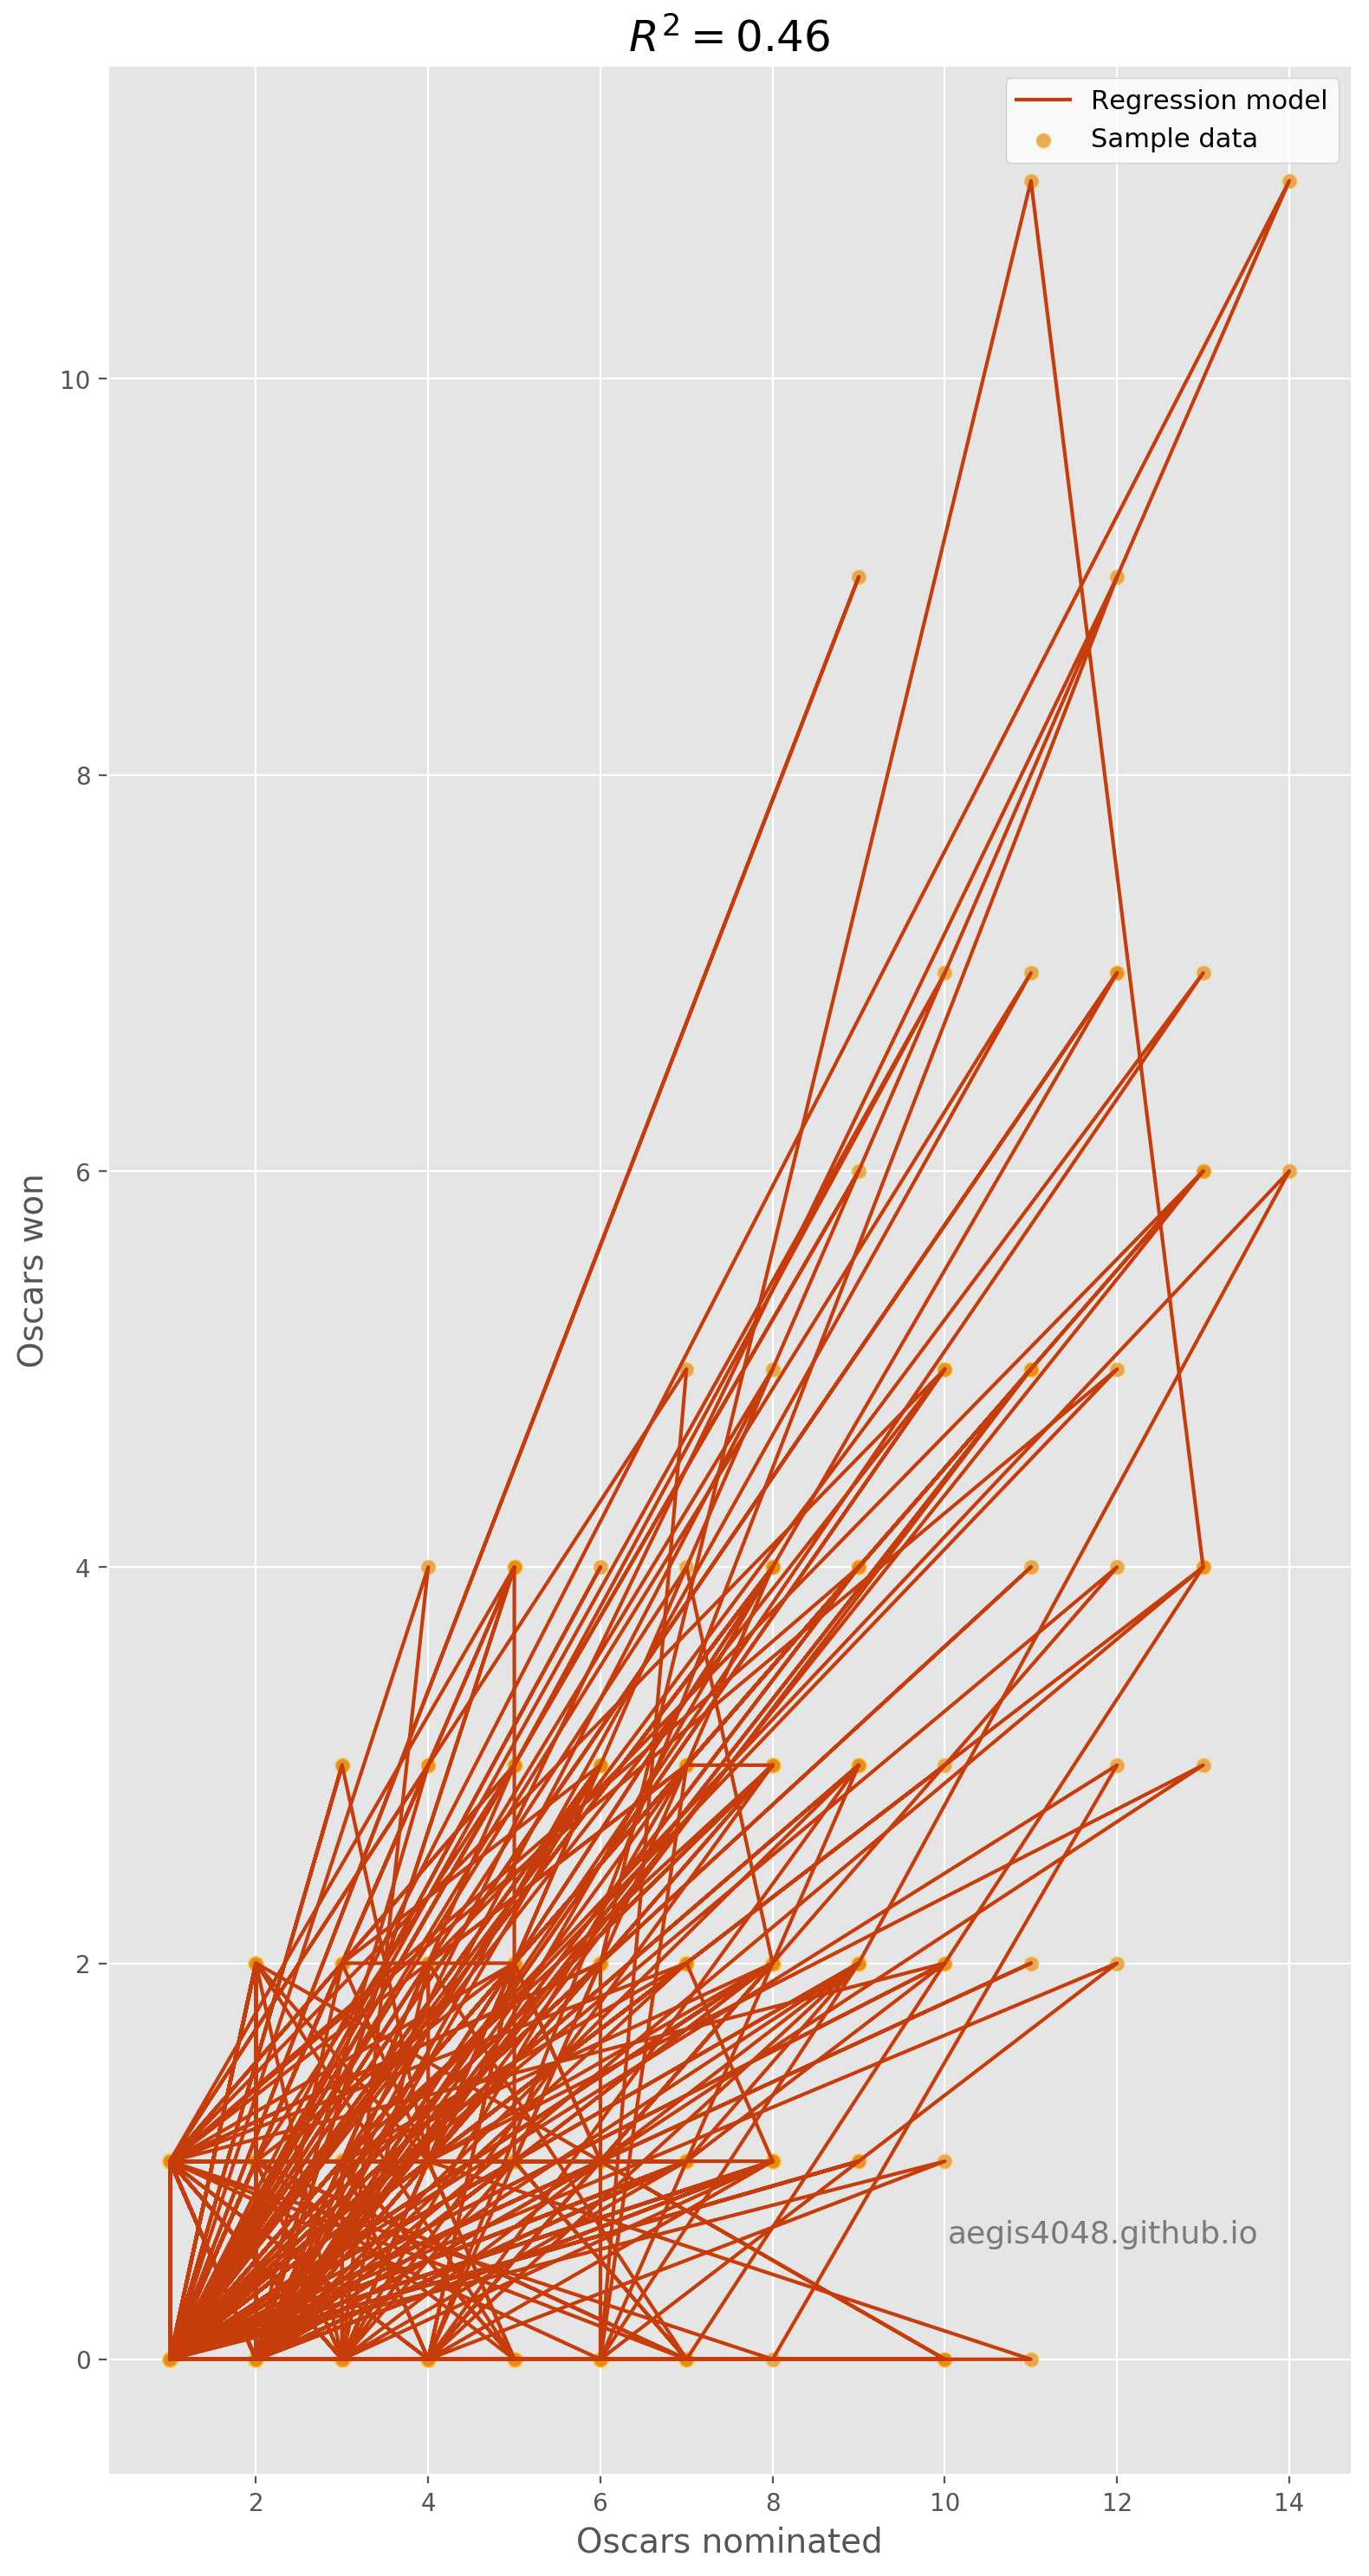

In [454]:
plt.style.use('default')
plt.style.use('ggplot')
X = new_sorted_movie_df4['times_nominated'].values
y = new_sorted_movie_df4['oscar_win'].values
fig, ax = plt.subplots(figsize=(8, 15))
r2=0.459
ax.plot(X, y6, color='#c63c0a', label='Regression model')
ax.scatter(X, y6, edgecolor='#ffc94a', facecolor='#e68c14', alpha=0.7, label='Sample data')
ax.set_ylabel('Oscars won', fontsize=14)
ax.set_xlabel('Oscars nominated', fontsize=14)
ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='k', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

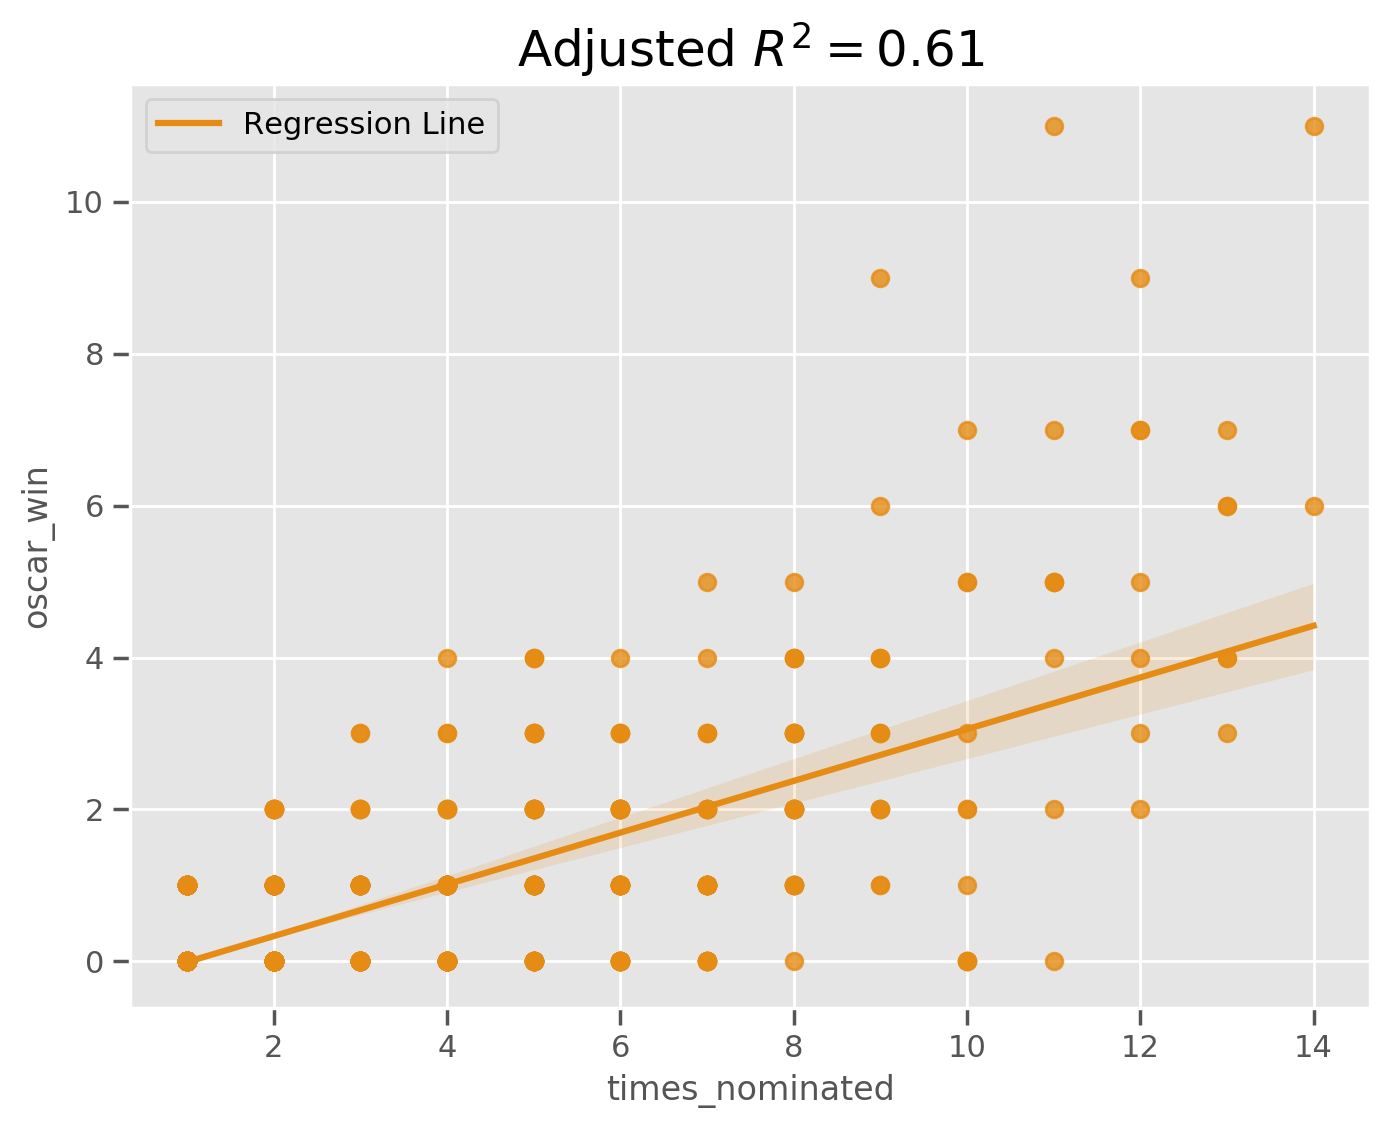

In [500]:
ax.grid(False)
r2=0.607
fig, ax = plt.subplots(figsize=(8,6))

sns.regplot(x=new_sorted_movie_df4['times_nominated'], y=new_sorted_movie_df4['oscar_win'], color='#e68c14', marker='o',label='Regression model')
ax.set_title('Adjusted $R^2= %.2f$' % r2, fontsize=18)
ax.legend(['Regression Line'])

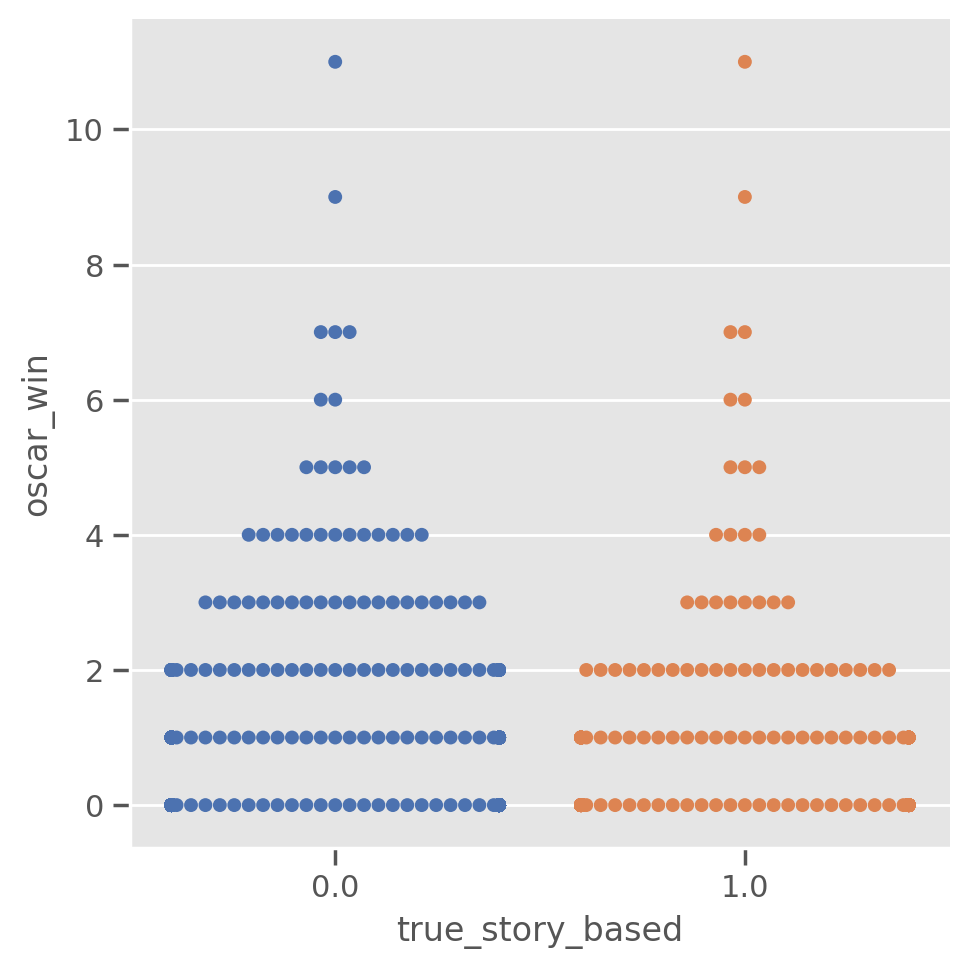

In [499]:

ax.grid(False)
r2=0.459


sns.catplot(x='true_story_based', y='oscar_win',kind='swarm',data=new_sorted_movie_df4)
